In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data = pd.read_csv('./data/triage_classification.csv')
data['gender'] = pd.Series(['M' if val==1 else 'F' for val in data['gender']])
data.rename(columns= {'Unnamed: 0' : 'ID'}, inplace=True)
data['ID'] = pd.Series([val+1 for val in range(len(data['ID']))])
data['exercise angina'] = pd.Series(['Yes' if val==1 else 'No' for val in data['exercise angina']])
data['hypertension'] = pd.Series(['Yes' if val==1 else 'No' for val in data['hypertension']])
data['heart_disease'] = pd.Series(['Yes' if val==1 else 'No' for val in data['heart_disease']])
data['chest pain type'] = pd.Series([str(int(val)) for val in data['chest pain type']])
data = data.drop('ID', axis=1)

In [46]:
#data = data.drop(['gender', 'chest pain type', 'exercise angina', 'hypertension', 'heart_disease', 'Residence_type', 'smoking_status'],axis=1)
y = data.pop('triage')

data = pd.get_dummies(data)


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = scaler.fit_transform(data)


array([4.95964780e+00, 2.36072540e+00, 2.20588954e+00, 1.82950769e+00,
       1.69269819e+00, 1.40939114e+00, 1.35017861e+00, 1.20792518e+00,
       1.15014042e+00, 1.04543364e+00, 1.02995954e+00, 1.02501296e+00,
       9.71861310e-01, 9.55079742e-01, 9.04628167e-01, 8.72921906e-01,
       8.39441772e-01, 7.21208663e-01, 6.37249636e-01, 5.35325284e-01,
       2.99796386e-01, 4.68708219e-31, 3.04915502e-31, 8.72872663e-32,
       3.08633648e-32, 3.08633648e-32, 3.08633648e-32, 6.90427267e-33])

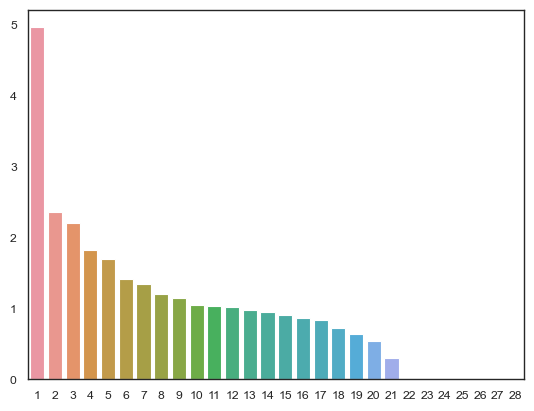

In [48]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(features)
pca_var = pca.explained_variance_

sns.set_context('paper')
sns.set_style('white')
sns.barplot(x=[i+1 for i in range(len(pca_var))],y = pca_var)
pca_var

(6961, 17)

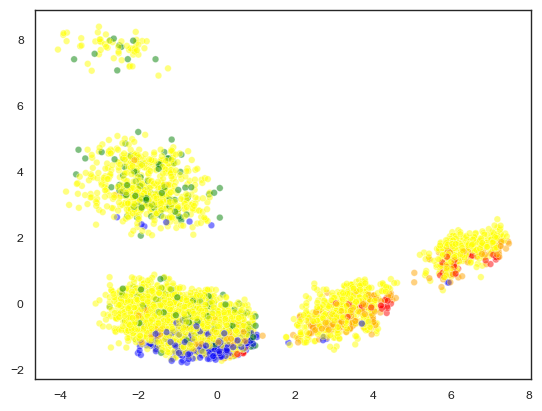

In [52]:
pca2 = PCA(n_components=17)
pca2.fit(features)
x_3d = pca2.transform(features)

sns.scatterplot(x=x_3d[:,0], y=x_3d[:,1], c=y, alpha = 0.5)
x_3d.shape

In [53]:
from imblearn.over_sampling import SMOTE

val_X = x_3d.copy()
val_Y = y.copy()

oversample = SMOTE()
X, y = oversample.fit_resample(x_3d,y)

In [55]:
X.shape
y.value_counts()

yellow    5631
orange    5631
red       5631
blue      5631
green     5631
Name: triage, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0)

_, x_val, _, y_val = train_test_split(val_X, val_Y, test_size=len(val_Y)-1, random_state=0)


In [65]:
X_train.shape

(25339, 17)

In [77]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=40, random_state=0, max_depth=20)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(x_val)

In [78]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val, y_pred))

[[ 422    0    0    0    0]
 [   0  439    0    0    0]
 [   0    1  338    0    0]
 [   0    0    0  129    0]
 [  33    7    8    4 5579]]
              precision    recall  f1-score   support

        blue       0.93      1.00      0.96       422
       green       0.98      1.00      0.99       439
      orange       0.98      1.00      0.99       339
         red       0.97      1.00      0.98       129
      yellow       1.00      0.99      1.00      5631

    accuracy                           0.99      6960
   macro avg       0.97      1.00      0.98      6960
weighted avg       0.99      0.99      0.99      6960

0.9923850574712644


<AxesSubplot: >

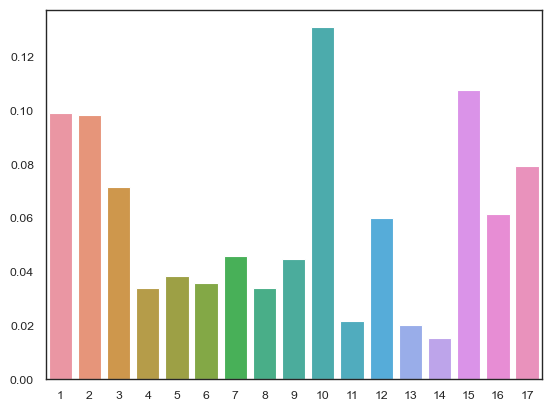

In [82]:
from sklearn.tree import plot_tree

feat_rank = classifier.feature_importances_
sns.barplot(x = [i+1 for i in range(len(feat_rank))], y = feat_rank)
#plot_tree(classifier.estimators_[0])